# Traing w2v on our data to generate embedding 
* this embedding can then be used as an embedding layer while training on neural network
* https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

# Importing dataset and necessary preprocessing

In [1]:
import nltk
print(nltk.__file__)

c:\users\me\appdata\local\programs\python\python37\lib\site-packages\nltk\__init__.py


In [2]:
 nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
from nltk.corpus import gutenberg
#sample = gutenberg.raw("bible-kjv.txt")
with open('sampleText.txt', 'r') as myfile:
    data=myfile.read().replace('\n', '')

# need stop words as word2vec expects token of sentences as an input

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
import re
punct = set(string.punctuation)
stopWords = set(stopwords.words('english'))

#later can use punkt or other tokenizer
#also didn't perform spelling correction textblob
def preProcess(review):
    token = word_tokenize(review) 
    tokens = [t.lower() for t in token]
    filterd_words = [word for word in tokens if word not in stopWords]
    return ' '.join(filterd_words)
#' '.join(text for text in filterd_words if text not in punct)
print(sent_tokenize(preProcess(data)))

['best laptop machine learning artificial intelligence ?', 'rise analysis platforms across every sector , leading big tech companies startups integrating machine learning deep learning existing system .', 'advancement led major revolution hardware required setups .', 'students beginners trying enter domain , willing take time working towards entering artificial intelligence sector , kind machine invest depending budget ?', 'present variety options available market.advertisementto personal machine projects mind , one needs choose mobility machine , , want carry around – laptop .', 'machine training algorithms alone – customized desktop home work.what minimum requirements machine ?', 'note : nvidia gpus cuda extension allows gpu support tensorflow pytorch.get started deep learning using matlabhigh end laptopsbudget laptopsyou also find budget laptops cuda enabled nvidia gpus deep learning .', 'gaming laptops specs essentially gaming also used deep learning .', 'downgrade ram cpu , one op

# Formatting to feed it to word2vec

In [5]:
# splitting based on punct
# can try with punct tokenizer as well
L = []
for i in sent_tokenize(preProcess(data)):
    token_list = word_tokenize(i)
    L.append(token_list)
    
print(L)

[['best', 'laptop', 'machine', 'learning', 'artificial', 'intelligence', '?'], ['rise', 'analysis', 'platforms', 'across', 'every', 'sector', ',', 'leading', 'big', 'tech', 'companies', 'startups', 'integrating', 'machine', 'learning', 'deep', 'learning', 'existing', 'system', '.'], ['advancement', 'led', 'major', 'revolution', 'hardware', 'required', 'setups', '.'], ['students', 'beginners', 'trying', 'enter', 'domain', ',', 'willing', 'take', 'time', 'working', 'towards', 'entering', 'artificial', 'intelligence', 'sector', ',', 'kind', 'machine', 'invest', 'depending', 'budget', '?'], ['present', 'variety', 'options', 'available', 'market.advertisementto', 'personal', 'machine', 'projects', 'mind', ',', 'one', 'needs', 'choose', 'mobility', 'machine', ',', ',', 'want', 'carry', 'around', '–', 'laptop', '.'], ['machine', 'training', 'algorithms', 'alone', '–', 'customized', 'desktop', 'home', 'work.what', 'minimum', 'requirements', 'machine', '?'], ['note', ':', 'nvidia', 'gpus', 'cud

#  Removing punctuation from 2-D list

In [6]:
#remove stopword now and then feed to network
lst = []
for sent in range(len(L)):
    lst.append([]) # create nested list
    for token in range(len(L[sent])):
        if L[sent][token] not in punct:
             lst[sent].append(L[sent][token])
print(lst)   

[['best', 'laptop', 'machine', 'learning', 'artificial', 'intelligence'], ['rise', 'analysis', 'platforms', 'across', 'every', 'sector', 'leading', 'big', 'tech', 'companies', 'startups', 'integrating', 'machine', 'learning', 'deep', 'learning', 'existing', 'system'], ['advancement', 'led', 'major', 'revolution', 'hardware', 'required', 'setups'], ['students', 'beginners', 'trying', 'enter', 'domain', 'willing', 'take', 'time', 'working', 'towards', 'entering', 'artificial', 'intelligence', 'sector', 'kind', 'machine', 'invest', 'depending', 'budget'], ['present', 'variety', 'options', 'available', 'market.advertisementto', 'personal', 'machine', 'projects', 'mind', 'one', 'needs', 'choose', 'mobility', 'machine', 'want', 'carry', 'around', '–', 'laptop'], ['machine', 'training', 'algorithms', 'alone', '–', 'customized', 'desktop', 'home', 'work.what', 'minimum', 'requirements', 'machine'], ['note', 'nvidia', 'gpus', 'cuda', 'extension', 'allows', 'gpu', 'support', 'tensorflow', 'pytor

# Word2vec embedding from genesim

In [7]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline

c:\users\me\appdata\local\programs\python\python37\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [8]:
'''
Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words
'''
%%time
model = Word2Vec(lst, min_count=5)

c:\users\me\appdata\local\programs\python\python37\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


Wall time: 825 ms


In [9]:
X = model[model.wv.vocab]
print(X.shape)

(130, 100)


c:\users\me\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [10]:
words = list(model.wv.vocab)

In [11]:
#need as we want to plot with names on
print(words)
print(len(words))

['best', 'laptop', 'machine', 'learning', 'deep', 'system', 'time', 'budget', 'one', 'want', 'around', 'training', 'minimum', 'nvidia', 'gpus', 'gpu', 'find', 'laptops', 'gaming', 'ram', 'cpu', 'build', 'pc', 'price', 'compared', 'give', 'high', 'buy', 'like', 'asus', 'rog', 'graphics', 'train', 'comes', 'power', 'powerful', "'s", 'good', 'get', '’', 'need', 'going', '7', 'great', 'value', '5', 'getting', 'right', 'would', 'surely', 'intel', 'core', 'i7', 'even', 'may', 'performance', 'decent', 'without', '10', '16gb', 'heavy', 'lightweight', '6', '1', '2', 'inspiron', 'cheapest', '3', 'eluktronics', 'pro-x', '4', 'gigabyte', 'aero', 'money', 'acer', 'predator', 'zephyrus', 'gx501', 'triton', 'i7-8750h', 'gtx', '1070', '8gb', 'check', 'i7-7700hq', '15x', '1080', '15.6', 'display', 'tasks', 'storage', 'offered', 'ssd', 'things', 'gen', 'processor', 'i.e', 'expect', 'hours', 'battery', 'life', 'recap', 'screen', 'size', 'inches.storage', '512gb', 'ddr4', 'ram.processor', 'card', '8gb.ope

# performing PCA _____ tSNE could be better option?

In [13]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

c:\users\me\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [14]:
#type(result)
result[1]

array([-0.00595927,  0.00171274], dtype=float32)

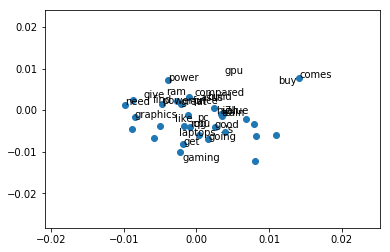

In [15]:
                #all x      , all y
pyplot.scatter(result[15:45, 0], result[15:45, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words[15:45]):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# Have graphed on plotly all 

In [16]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

trace1 = go.Scatter(
    y = result[:, 1],
    x = result[:, 0],
    #z = [0,1,2,3],
    text = words,
    textposition='top center',
    mode='markers+text',# showingtext and marker
    marker=dict(
        size=3,
        color =  'rgb(17, 157, 255)',#np.random.randn(139), #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace1]
plot(data)


'file://C:\\Users\\Me\\Desktop\\ppr red\\andrew\\nlp\\temp-plot.html'

# Determing similarity
* Unlike FastText , w2v are not able to detect n gram word **hence get error if we try to run cheap word**

In [14]:
model.most_similar("cheapest") 
#cheapest occurs in vocab
# else we would get error_ fastxt manages it

c:\users\me\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
c:\users\me\appdata\local\programs\python\python37\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('card', 0.29685431718826294),
 ('zephyrus', 0.29467377066612244),
 ('offered', 0.2885759174823761),
 ('battery', 0.26549363136291504),
 ('high', 0.24234750866889954),
 ('good', 0.23330439627170563),
 ('triton', 0.2266298234462738),
 ('run', 0.22454530000686646),
 ('amazon', 0.21705487370491028),
 ('pretty', 0.21033044159412384)]

In [52]:
model.doesnt_match("gpu life like".split())

c:\users\me\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).



'like'

# Save this trained model and use it as input to N.N as embd layer

In [ ]:
#binary format to save  
#model.wv.save_word2vec_format('model.bin')
#ASCII
model.wv.save_word2vec_format('sampleText.txt', binary=False)

* To be able to generate good embeddings , it should be trained on larger corpus of data.
* with ofcourse proper hyper parameter setting.